In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
# pip install pyspellchecker

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

path_df1 = "data/all.jsonl"
path_df2 = "data/data.csv"


def get_data_df1(file_path):
    df = pd.read_json(file_path, lines=True)
    df = df.drop(['source', 'index', 'question'], axis=1)
    human_df = pd.DataFrame(df["human_answers"].explode("human_answers")).rename(columns={"human_answers": "text"})
    human_df["label"] = 1

    chatgpt_df = pd.DataFrame(df["chatgpt_answers"].explode("chatgpt_answers")).rename(columns={"chatgpt_answers": "text"})
    chatgpt_df["label"] = 0

    df = pd.concat([human_df, chatgpt_df], ignore_index=True)
    df["text"] = df["text"].astype(str)

    return df # train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)


def get_data_df2(file_path):
    df = pd.read_csv(file_path)
    return df.drop(['src'], axis=1)


def get_data_mixed():
    df1 = get_data_df1(path_df1)
    df2 = get_data_df2(path_df2)
    return pd.concat([df1, df2], ignore_index=True)


# df2 = get_data_df1(path_df1) # ancien 
df = get_data_df2(path_df2) # nouveau 

In [12]:
df.shape

(56819, 2)

In [13]:
df.head()

,text,label
0,Little disclaimer: this deals with US laws and...,1
1,"Read: Mentally Retarded Downs. See, we've got ...",1
2,"If any of you frequent rbadhistory, there is a...",1
3,"I believe in a flat tax system, where everyone...",1
4,"Edit: Ok guy's, my views have been changed on ...",1


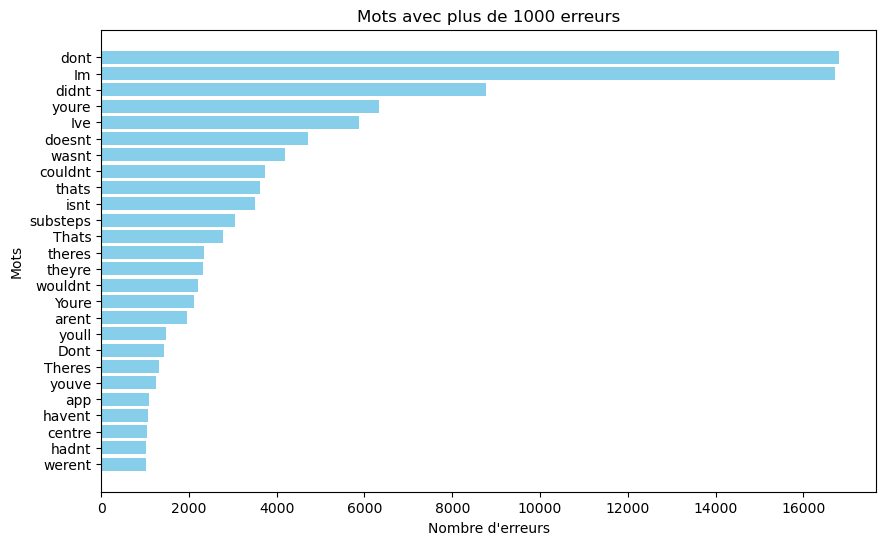

In [27]:
import string
import matplotlib.pyplot as plt

# Initialiser le correcteur d'orthographe
spell = SpellChecker()

# Liste blanche de mots autorisés
allowed_words = {'I', "I'm", "I've", "Mr", "UK", "EU", "TV", "BBC", "etc", "CMV", "UK", "European", "American", "British", 
                 "Europe", "Scotland", "London", "Facebook", "Chinese", "Google", "England","James","June","David","Dr","Tim",
                 "April",""}

# Dictionnaire pour compter les erreurs par mot
errors_count = {}

# Liste des caractères à ignorer
ignore_chars = string.punctuation + '“”’‘[]'

# Parcourir chaque texte dans le dataset
for text in df['text']:
    # Supprimer les caractères de ponctuation
    clean_text = ''.join(char for char in text if char not in ignore_chars)
    # Diviser le texte nettoyé en mots
    words = clean_text.split()
    # Vérifier chaque mot
    for word in words:
        # Vérifier si le mot est considéré comme une erreur, n'est pas dans la liste des mots autorisés et ne commence pas par "[" ou ne finit pas par "]"
        if spell.unknown([word]) and word not in allowed_words:
            # Ajouter le mot au dictionnaire de comptage des erreurs
            errors_count[word] = errors_count.get(word, 0) + 1

# Filtrer les mots avec plus de 1000 erreurs
filtered_errors_count = {word: count for word, count in errors_count.items() if count > 1000}

# Trier le dictionnaire par valeur pour obtenir les mots avec le plus d'erreurs
sorted_errors_count = sorted(filtered_errors_count.items(), key=lambda x: x[1], reverse=True)

# Extraire les données pour le graphique
words = [word for word, count in sorted_errors_count]
counts = [count for word, count in sorted_errors_count]

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Nombre d\'erreurs')
plt.ylabel('Mots')
plt.title('Mots avec plus de 1000 erreurs')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les mots les plus fréquents en haut
plt.show()
